In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import pickle
import os,sys
import pyxdf as xdf
import torch
from torch.utils.data import DataLoader
import math

sys.path.append("../models/model_based_files/")
sys.path.append("../models/Data_based_models/LSTM4/")
from Speed_Recognition_3 import SpeedRecProcessing as SRP
from model_2 import Speed_model_2 as SP

#from model2 import CNN_LSTM as CLSTM
from preprocessing1 import preprocess,split
from model import CNN_LSTM as CLSTM

/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def round_nearest(x,a):
    if math.isnan((x / a) * a):
        return 0
    else:
        num=np.round(np.round(x / a) * a, -int(math.floor(math.log10(a))))      
        if num==1.2:
            num=1.25
        return num


In [18]:
run=6
path=f'../Recordings/sub-P004/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=d['data']


here


In [2]:
run=13
path=f'../sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf'

data,header=xdf.load_xdf(path)

for stream in data:
    if stream['info']['name'][0]=='imu_stream_new':
        imu_data=stream['time_series']
        print('imu data')
    if stream['info']['name'][0]=='polar accel':
        polar_data=stream['time_series']
        print('polar data')
data=polar_data

Stream 1: Calculated effective sampling rate 163.1623 Hz is different from specified rate 200.0000 Hz.


polar data


In [19]:

norm=pickle.load(open('../models/Data_based_models/LSTM2/normalizer.pkl','rb'))
X,Y=split(data,1
          ,window=1,sample_rate=200,vert_acc_i=0,interval=0.5)
#test_dataset=IMU(X,Y,size=400,num_features=6)
#test_loader=DataLoader(test_dataset,batch_size=1)
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=norm.fit_transform(X)
X=X.reshape(X.shape[0],3,200)
print(X.shape)

(441, 3, 200)


In [5]:
from model import CNN_LSTM as CLSTM1
model=CLSTM1(input_size=3,num_classes=1,input_length=200)
model.load_state_dict(torch.load("../models/Data_based_models/LSTM4/model_10.h5"))

<All keys matched successfully>

In [20]:
model.eval()
X=X.reshape((-1,3,200))
preds=[]
with torch.no_grad():
    for i in range(X.shape[0]):
        output=model.forward_run(X[i,:,:])
        print(output)
        preds+=output.detach().cpu()
        

tensor([0.7582])
tensor([0.7756])
tensor([1.3181])
tensor([1.0445])
tensor([0.8763])
tensor([1.2683])
tensor([1.0219])
tensor([1.0636])
tensor([1.1759])
tensor([1.1937])
tensor([1.2271])
tensor([1.2377])
tensor([1.3340])
tensor([1.3625])
tensor([1.4896])
tensor([1.5093])
tensor([1.4832])
tensor([1.5137])
tensor([1.5003])
tensor([1.5201])
tensor([1.5154])
tensor([1.5194])
tensor([1.5130])
tensor([1.5152])
tensor([1.4980])
tensor([1.5029])
tensor([1.4917])
tensor([1.5047])
tensor([1.5075])
tensor([1.5146])
tensor([1.5179])
tensor([1.5120])
tensor([1.5136])
tensor([1.5082])
tensor([1.5125])
tensor([1.5123])
tensor([1.5180])
tensor([1.5110])
tensor([1.5178])
tensor([1.5003])
tensor([1.5140])
tensor([1.5060])
tensor([1.5201])
tensor([1.5118])
tensor([1.5171])
tensor([1.5081])
tensor([1.5103])
tensor([1.5139])
tensor([1.5214])
tensor([1.5148])
tensor([1.5212])
tensor([1.4923])
tensor([1.5137])
tensor([1.5176])
tensor([1.5159])
tensor([1.5180])
tensor([1.5146])
tensor([1.5143])
tensor([1.5129

In [21]:
preds=[round_nearest(x,0.25) for x in preds]

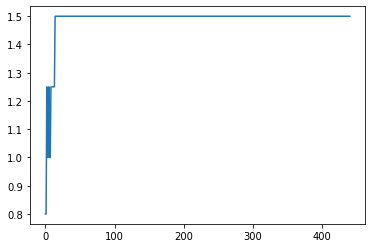

In [22]:
plt.plot(preds)